In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.inspection import permutation_importance

In [165]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [166]:
# Load the dataset from Google Drive
file_path = '/content/drive/MyDrive/Bologna/final_results/final dataset.csv'
data = pd.read_csv(file_path)

In [169]:
# Shuffle the dataset
data_shuffled = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [170]:
# Drop unnecessary columns
data_processed = data.drop(columns=['Unnamed: 0', 'date', 'lat', 'lon', 'panoID'])

In [171]:
# Split features and target variable
X = data_processed.drop(columns=['probability '])
y = data_processed['probability ']

In [172]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [173]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [174]:
# Create and fit the model
model = HistGradientBoostingRegressor()
model.fit(X_train_scaled, y_train)

HistGradientBoostingRegressor()

In [175]:
# Evaluate the model
train_score = model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)

print("Training R^2 Score:", train_score)
print("Testing R^2 Score:", test_score)

Training R^2 Score: 0.6111506569430796
Testing R^2 Score: 0.11901742859258968


In [176]:
# Calculate the Pearson correlation coefficients
correlation = data_processed.corr()['probability '].sort_values()

In [177]:

print("Feature Correlation:")
print(correlation)

Feature Correlation:
greenery        -0.201714
terrain type    -0.171797
sky             -0.142553
dirt            -0.072466
television      -0.033778
                   ...   
buffet                NaN
stage                 NaN
cradle                NaN
microwave             NaN
shower                NaN
Name: probability , Length: 132, dtype: float64


In [178]:
# Get permutation importances
perm_importance = permutation_importance(model, X_test_scaled, y_test, n_repeats=30, random_state=42)


In [179]:
# Sort the features by importance
sorted_idx = perm_importance.importances_mean.argsort()[::-1]

In [180]:
# Print feature importances
print("Feature Importances:")
for i in sorted_idx:
    print(f"{X.columns[i]}: {perm_importance.importances_mean[i]:.4f}")

Feature Importances:
greenery: 0.0601
person: 0.0429
terrain type : 0.0331
sky: 0.0300
fence: 0.0264
building: 0.0217
signboard: 0.0177
earth: 0.0119
bridge: 0.0093
path : 0.0080
pole: 0.0065
dirt: 0.0064
floor: 0.0058
vehicles: 0.0051
bicycle: 0.0039
cabinet: 0.0033
railing: 0.0029
streetlight: 0.0026
flag: 0.0020
ceiling: 0.0014
palm: 0.0013
ashcan: 0.0011
box: 0.0010
windowpane: 0.0010
grandstand: 0.0010
boat: 0.0010
stairway: 0.0010
seat: 0.0010
water: 0.0009
stairs: 0.0008
tank: 0.0007
bench: 0.0006
bed: 0.0006
shelf: 0.0005
awning: 0.0005
fountain: 0.0004
step: 0.0003
book: 0.0000
toilet: 0.0000
screen: 0.0000
mirror: 0.0000
coffee: 0.0000
blind: 0.0000
bookcase: 0.0000
countertop: 0.0000
stove: 0.0000
rug: 0.0000
kitchen: 0.0000
armchair: 0.0000
case: 0.0000
pillow: 0.0000
curtain: 0.0000
desk: 0.0000
wardrobe: 0.0000
lamp: 0.0000
bathtub: 0.0000
computer: 0.0000
cushion: 0.0000
chest: 0.0000
pool: 0.0000
sink: 0.0000
skyscraper: 0.0000
fireplace: 0.0000
refrigerator: 0.0000
pai

In [184]:
# Calculate minimum and maximum importance
min_importance = perm_importance.importances_mean.min()
max_importance = perm_importance.importances_mean.max()

print("Minimum Importance:", min_importance)
print("Maximum Importance:", max_importance)

Minimum Importance: -0.006414545548159804
Maximum Importance: 0.060055870209729786


In [185]:
# Set the threshold as a percentage of the maximum absolute importance value
max_abs_importance = max(abs(min_importance), abs(max_importance))
threshold_percentage = 0.05  # Adjust as needed
threshold = threshold_percentage * max_abs_importance


In [186]:
# Determine features to remove
features_to_remove = []
for i, importance in enumerate(perm_importance.importances_mean):
    if abs(importance) < threshold:
        features_to_remove.append(X.columns[i])

print("Features to Remove:", features_to_remove)

Features to Remove: ['ceiling', 'bed', 'windowpane', 'door', 'table', 'curtain', 'chair', 'water', 'painting', 'sofa', 'shelf', 'mirror', 'rug', 'armchair', 'seat', 'desk', 'rock', 'wardrobe', 'lamp', 'bathtub', 'railing', 'cushion', 'box', 'chest', 'counter', 'sink', 'skyscraper', 'fireplace', 'refrigerator', 'grandstand', 'stairs', 'runway', 'case', 'pool', 'pillow', 'screen', 'stairway', 'bookcase', 'blind', 'coffee', 'toilet', 'book', 'bench', 'countertop', 'stove', 'palm', 'kitchen', 'computer', 'swivel', 'boat', 'bar', 'arcade', 'hovel', 'towel', 'light', 'tower', 'chandelier', 'awning', 'streetlight', 'booth', 'television', 'airplane', 'apparel', 'bannister', 'escalator', 'ottoman', 'bottle', 'buffet', 'poster', 'stage', 'ship', 'fountain', 'conveyer', 'canopy', 'washer', 'plaything', 'swimming', 'stool', 'barrel', 'basket', 'waterfall', 'tent', 'bag', 'cradle', 'oven', 'ball', 'food', 'step', 'tank', 'trade', 'microwave', 'pot', 'animal', 'dishwasher', 'blanket', 'sculpture', '

In [187]:
# Remove features from the dataset
X_reduced = X.drop(columns=features_to_remove)

In [188]:
# Define the directory to save the results
final_results_dir = "/content/drive/MyDrive/Bologna/final_results"

# Create the directory if it doesn't exist
os.makedirs(final_results_dir, exist_ok=True)

# Save the reduced feature set to a CSV file
X_reduced.to_csv(os.path.join(final_results_dir, "reduced_features.csv"), index=False)

In [ ]:
import os

# Create the final_results directory if it doesn't exist
final_results_dir = "/path/to/your/drive/final_results"
os.makedirs(final_results_dir, exist_ok=True)

# Save feature importances to a CSV file
importance_df = pd.DataFrame({'Feature': X.columns[sorted_idx], 'Importance': perm_importance.importances_mean[sorted_idx]})
importance_df.to_csv(os.path.join(final_results_dir, "feature_importances.csv"), index=False)



In [209]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [212]:
file_path = '/content/drive/MyDrive/Bologna/final_results/reduced_features.csv'
data = pd.read_csv(file_path)


# Drop unnecessary columns and the target variable
data_processed = data.drop(columns=['Unnamed: 0', 'date', 'lat', 'lon', 'panoID', 'probability '])

# Split features and target variable
X = data_processed
y = data['probability ']

# Calculate the correlation coefficients
correlation = data_processed.corrwith(y).sort_values()

print("Feature Correlation:")
print(correlation)

# Define the directory to save the results
final_results_dir = "/path/to/your/drive/final_results"

# Create the directory if it doesn't exist
os.makedirs(final_results_dir, exist_ok=True)

# Save correlation to a CSV file
correlation.to_csv(os.path.join(final_results_dir, "feature_correlation.csv"), header=["Correlation"])

Feature Correlation:
greenery        -0.201714
terrain type    -0.171797
sky             -0.142553
fence           -0.009144
vehicles         0.027011
signboard        0.034106
wall             0.063744
pole             0.091842
path             0.116412
bicycle          0.209688
person           0.216736
building         0.295025
dtype: float64


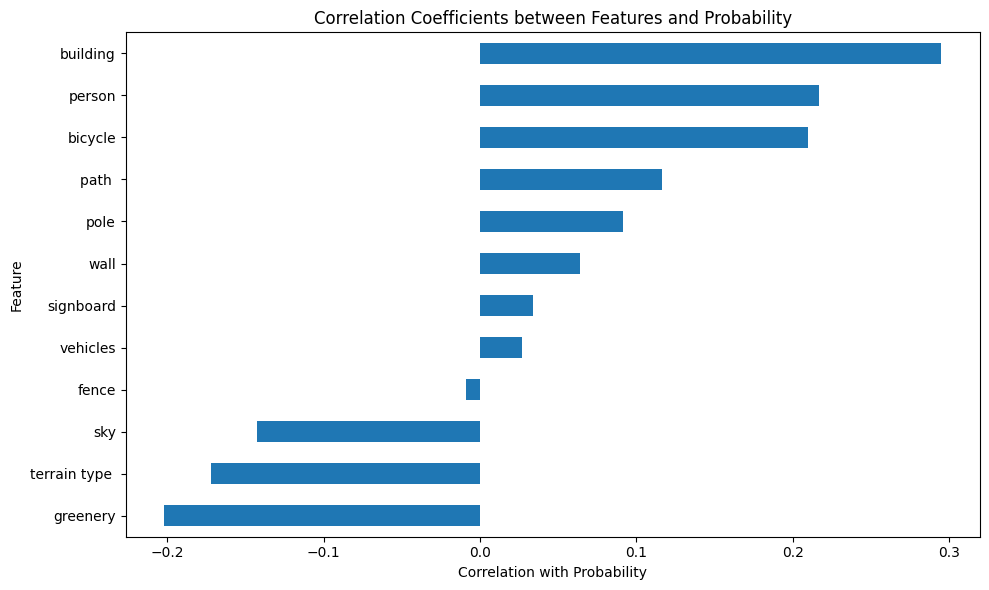

In [213]:
import matplotlib.pyplot as plt

# Plot correlation coefficients
plt.figure(figsize=(10, 6))
correlation.plot(kind='barh')
plt.xlabel('Correlation with Probability')
plt.ylabel('Feature')
plt.title('Correlation Coefficients between Features and Probability')
plt.tight_layout()

# Save the plot
plt.savefig(os.path.join(final_results_dir, "correlation_plot.png"))

# Show the plot
plt.show()

